In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
os.environ['TANGOS_DB_CONNECTION'] = '/home/akinshol/Data/Timescales/TangosData/h329.db'

#mpl.rcParams['font.monospace'] = 'Terminal'
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

We load in the tangos data for the h329 simulation.

In [2]:
import tangos

In [3]:
tangos.all_simulations()

[<Simulation("snapshots")>]

In [4]:
s = tangos.get_simulation('snapshots')

In [5]:
s.timesteps

[<TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000071' z=15.93 t=0.25 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000096' z=12.94 t=0.33 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000107' z=11.99 t=0.37 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000139' z=9.95 t=0.48 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000188' z=7.99 t=0.64 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000192' z=7.86 t=0.66 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000225' z=6.98 t=0.77 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000275' z=5.99 t=0.94 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000288' z=5.78 t=0.98 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000347' z=4.99 t=1.18 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000384' z=4.60 t=1.30 Gyr>,
 <TimeStep 'snapshots/h329.cosmo50PLK.3072gst5HbwK1BH.000456' z=4.00 t=1.54 Gyr>,
 <TimeStep 's

In [6]:
haloids = {
    1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 19, 18, 11],
    7: [7, 6, 6, 6, 6, 5, 5, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 6, 7, 7, 8, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 
        6, 8, 8, 9, 10, 8, 9, 9, 10, 11, 10, 14, 14, 14, 16, 17, 23, 22, 22, 24, 30, 25, 24],
    10: [10, 10, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 13, 13, 13, 14, 14, 14, 15, 14, 16, 15, 16, 15, 15, 15, 14, 14, 
         13, 13, 13, 14, 14, 16, 16, 16, 19, 20, 22, 20, 19, 19, 19, 18, 19, 16, 24, 27, 34, 42, 44, 60, 71],
    13: [13, 13, 13, 13, 13, 13, 13, 16, 16, 15, 15, 15, 16, 16, 16, 17, 18, 18, 17, 16, 18, 17, 18, 17, 17, 17, 17, 
         15, 16, 16, 18, 22, 24, 26, 26, 28, 25, 26, 27, 28, 24, 24, 25, 35, 38, 29, 44, 36, 54, 60, 61],
    15: [15, 15, 15, 15, 15, 15, 16, 17, 17, 16, 17, 16, 17, 17, 17, 20, 20, 19, 22, 21, 23, 22, 22, 22, 23, 23, 23, 
         24, 25, 25, 25, 24, 23, 25, 25, 29, 33, 31, 36, 35, 37, 37, 37, 37, 37, 28, 40, 31, 41, 59],
    19: [19, 19, 18, 18, 17, 18, 18, 19, 18, 17, 16, 17, 18, 19, 28, 31, 33, 34, 34, 33, 35, 33, 34, 31, 31, 32, 33, 
         35, 35, 36, 36, 34],
    27: [27, 29, 29, 27, 27, 27, 27, 28, 29, 28, 29, 28, 30, 32, 31, 32, 31, 32, 32, 31, 32, 32, 42, 30, 30, 31, 30, 
         33, 32, 34, 34, 42, 39, 44, 43, 43, 47, 48, 52, 49, 48, 59, 62, 62, 61, 38],
    29: [29, 27, 23, 21, 18, 17, 15, 14, 13, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 11, 13, 12, 14, 13, 12, 12, 11, 
         11, 11, 11, 11, 10, 11, 10, 9, 9, 20, 22, 26, 27, 25, 39, 39, 39, 42, 42, 48, 49, 50, 50, 49, 66, 68, 74, 
         77, 97, 89],
    31: [31, 31, 27, 25, 25, 25, 24, 25, 25, 24, 25, 25, 26, 28, 26, 27, 27, 28, 29, 27, 29, 28, 29, 28, 29, 30, 29, 
         28, 28, 29, 29, 28, 28, 30, 29, 30, 30, 28, 30, 31, 27, 23, 23, 25, 27, 23, 42, 34, 40, 45, 43, 39, 80, 90, 
         89, 78, 66, 65],
    32: [32, 32, 32, 32, 32, 34, 34, 35, 34, 33, 32, 30, 31, 31, 27, 19, 17, 16, 25, 29, 15, 13, 13, 12, 11, 11, 12, 
         13, 12, 12, 12, 11, 13, 13, 13, 14, 14, 15, 14, 13, 14, 15, 15, 14, 17, 14, 19, 21, 55],
    49: [49, 50, 50, 50, 51, 52, 51, 56, 56, 56, 58, 59, 60, 64, 61, 61, 62, 60, 59, 57, 60, 59, 59, 59, 59, 60],
    55: [55, 56, 54, 54, 55, 55, 55, 55, 51, 48, 49, 48, 49, 48, 46, 43, 44, 44, 41, 41, 42, 42, 41, 42, 40, 41, 39, 
         41, 39, 40, 40, 44, 44, 43, 41, 41, 46, 46, 48, 46, 43, 42, 41, 45, 53, 34, 53, 42, 64, 159, 158, 171, 169,
         191, 193, 148, 106, 105],
    91: [91, 91, 93, 93, 92, 92, 90, 89, 91, 97, 110, 124, 137, 152, 125, 111, 111, 113, 111, 107, 111, 107, 110, 109, 
         111, 113],
    94: [94, 96, 97, 99, 99, 101, 101, 100, 101, 104, 102, 98, 101, 99, 92, 103, 120, 118, 101, 97, 90, 85, 85, 110, 
         84, 84, 69, 71, 70, 73, 74, 73, 72, 70, 69, 62, 57, 50, 42, 39, 36, 30, 31, 33, 36, 27, 41, 32, 44, 52, 52, 
         56, 49, 54, 54, 52, 71, 73],
    116: [116, 118, 119, 123, 121, 122, 119, 116, 114, 113, 111, 101, 105, 102, 100, 96, 92, 92, 91, 84, 86, 87, 84, 
          82, 80, 81, 79, 70, 62, 56, 55, 51, 43, 37, 34, 34, 34, 30, 32, 29, 28, 25, 26, 21, 28, 22, 30, 30, 33, 
          35],
    119: [119, 123, 124, 129, 126, 126, 126, 127, 130, 131, 133, 133, 135, 136, 131, 130, 122, 104, 76, 66],
    131: [131, 136, 133, 138, 138, 137, 138, 137, 139, 142, 143, 143, 146, 149, 147, 151, 150, 150, 151, 150, 149, 
          148, 152, 152, 155, 158, 159, 158, 157, 169, 170, 168, 168, 163, 160, 167, 171, 172, 172, 175, 170, 178, 
          176, 170, 173, 47, 169, 177, 180, 176, 171, 164, 163, 165, 163, 136, 130, 123, 71, 42, 34, 9],
    132: [132, 119, 107, 106, 113, 151, 168, 160, 111, 83, 71, 64, 64, 58, 52, 53, 56],
    154: [154, 154, 152, 156, 151, 162, 149, 150, 149, 150, 146, 145, 149, 150, 146, 147, 144, 139, 135, 131, 126, 
          112, 108, 96, 85, 88, 89, 88, 80, 80, 79, 79, 70, 67, 66, 58, 49, 49, 51, 58, 53, 51, 50, 55, 60, 62, 
          67, 67, 69, 68, 71, 70, 70, 76, 74, 73, 72, 69],
    443: [443, 435, 416, 375, 336, 309, 455, 336, 156, 73, 48]
}

In [15]:
halo = s.timesteps[-1].halos[31]
halo_num, = halo.calculate_for_progenitors('halo_number()')
print(halo_num)
print(halo_num[45],halo_num[47])

[ 32  32  32  32  32  34  34  35  34  33  32  30  31  31  27  19  17  16
  25  29  15  13  13  12  11  11  12  13  12  12  12  11  13  13  13  14
  14  15  14  13  14  15  15  14  17  16  19  22  55  55  53  65  88 187
 204 193 202 198 154]
16 22


1


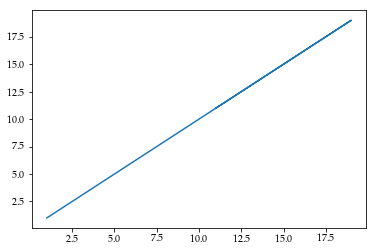

7


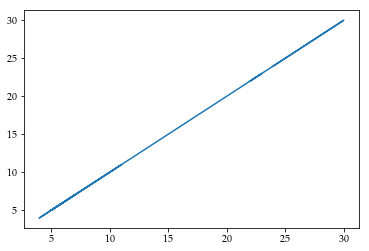

10


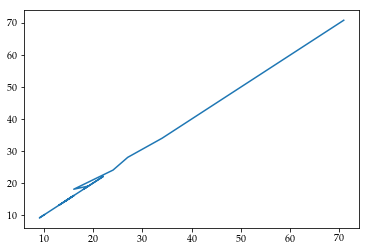

13


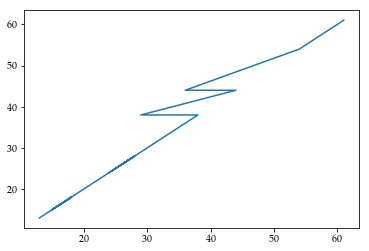

15


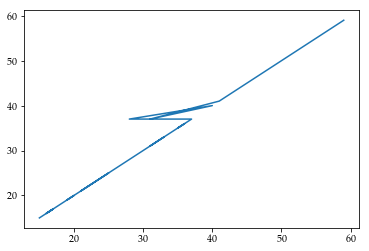

19


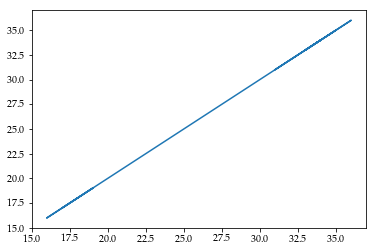

27


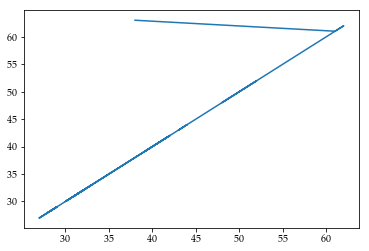

29


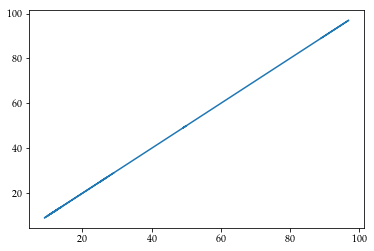

31


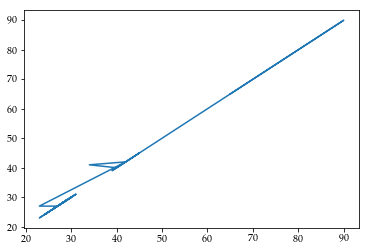

32


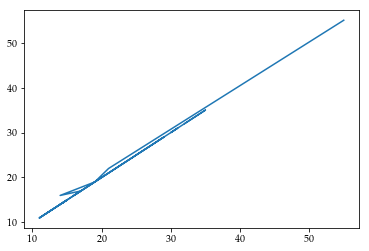

49


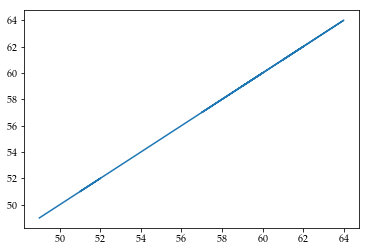

55


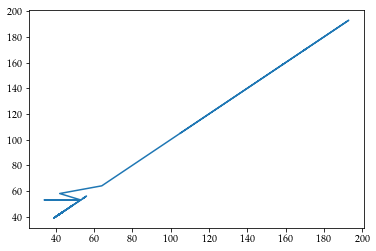

91


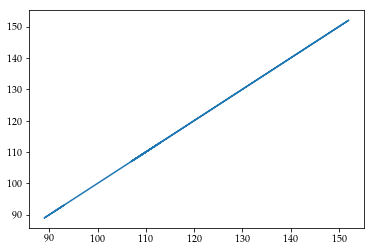

94


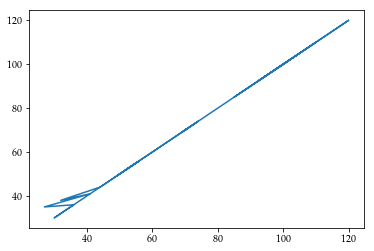

116


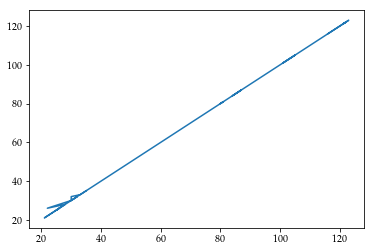

119


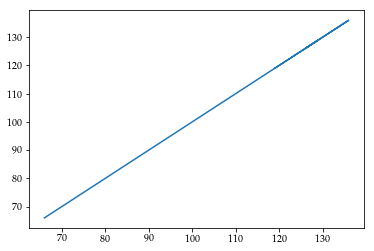

131


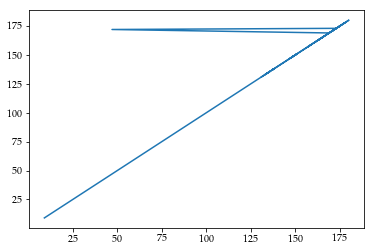

132


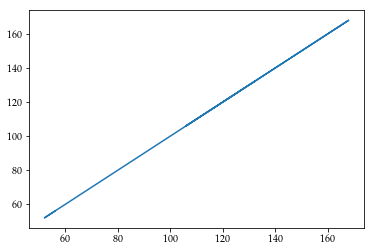

154


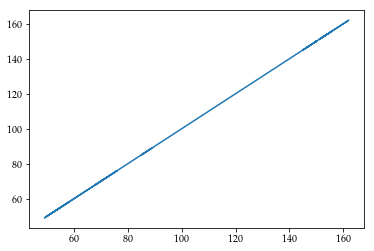

443


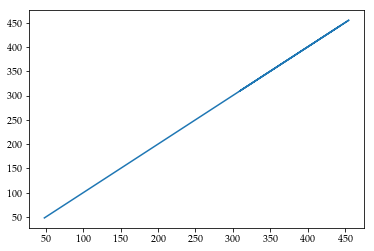

In [11]:
for z0haloid in list(haloids.keys()):
    halo = s.timesteps[-1].halos[z0haloid-1]
    halo_num = halo.calculate_for_progenitors('halo_number()')
    print(z0haloid)
#     print(haloids[z0haloid])
#     print(list(halo_num[0])[:len(haloids[z0haloid])])
    plt.plot(haloids[z0haloid],list(halo_num[0])[:len(haloids[z0haloid])])
    plt.show()

In [9]:
halo = s.timesteps[-1].halos[28]
print(halo['n_star'])
# SFR_10, SFR_100, time = halo.calculate_for_progenitors('SFR_10Myr', 'SFR_100Myr', 't()')

# plt.figure(dpi=200)
# plt.plot(time, SFR_10)
# plt.plot(time, SFR_100)
# plt.show()



# halo_num = halo.calculate_for_progenitors('halo_number()')
# halo_num

22


In [5]:
halo = tangos.get_halo('snapshots/%004096/halo_1')
print(halo.keys())

['Mvir', 'Rvir', 'Xc', 'Yc', 'Zc', 'Rvir', 'SFR_10Myr', 'SFR_100Myr', 'n_star', 'M_star', 'ptcls_in_common']


I defined this quick function to see how many halos there are in a particular timestep. I'm sure there's a better way to do this but this worked just fine for me. 

In [6]:
def hlen(tstep):
    l = 0
    while True:
        try:
            tstep.halos[l]
            l += 1
        except:
            break
    return l

Now we need to know which halos we are interested in---that is, which halos end up within one virial radius of the host halo. So, first we grab the positon and radius of the host halo, and then compute the $z=0$ distance between each satellite and the host. 

In [7]:
import numpy as np
tstep = -1
haloids = range(hlen(s.timesteps[-1]))

h1dist = []
halo1 = s.timesteps[tstep].halos[0]

h1x = halo1['Xc']
h1y = halo1['Yc']
h1z = halo1['Zc']
h1r = halo1['Rvir'][0] # this is just bc i accidentally imported Rvir twice 

In [8]:
for i in haloids:
    halo = s.timesteps[tstep].halos[i]
    x = halo['Xc']
    y = halo['Yc']
    z = halo['Zc']
    h1dist.append( np.sqrt((x-h1x)**2 + (y-h1y)**2 + (z-h1z)**2) / h1r )

In [9]:
h1dist = np.array(h1dist)
haloids = np.array(haloids)

print(list(haloids[h1dist < 1]))

[0, 6, 30, 50, 71, 97, 115, 118, 121, 153, 176, 212, 221, 238, 243, 251, 277, 306, 310, 311, 322, 326, 352, 407, 485, 489, 500, 510, 517, 532, 540, 568]


0.5387254755160633
3.0336978340953085


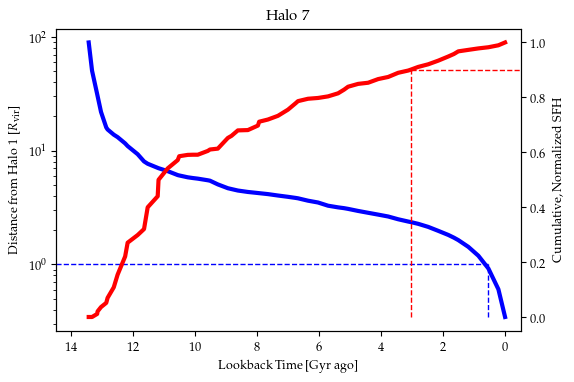

2.801372472779038


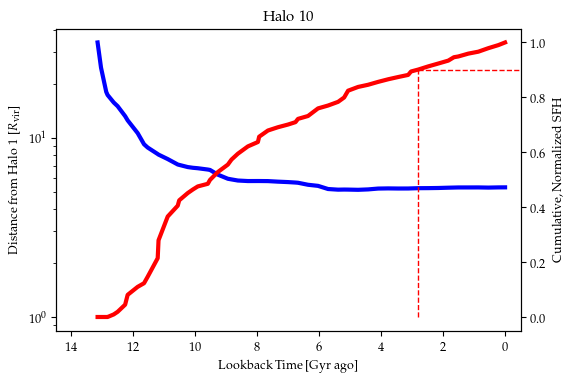

1.5084313314506215


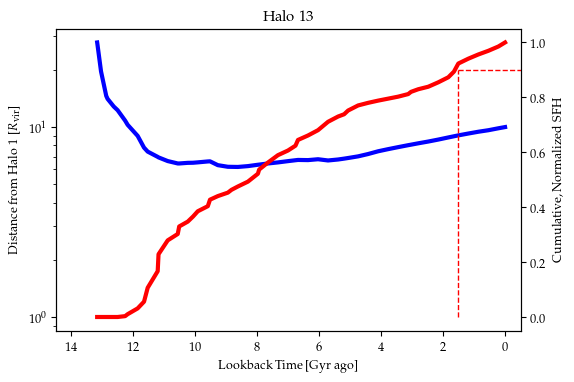

1.8316666167675422


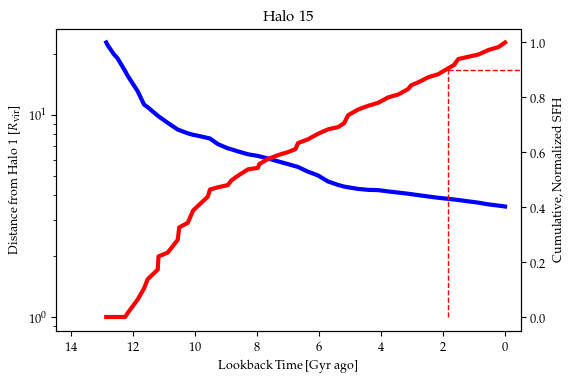

2.1549019020950624


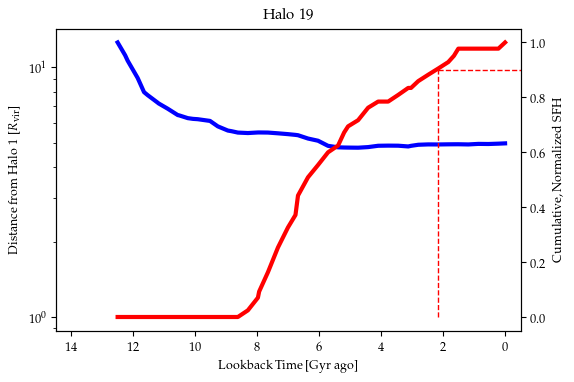

3.4478430433984677


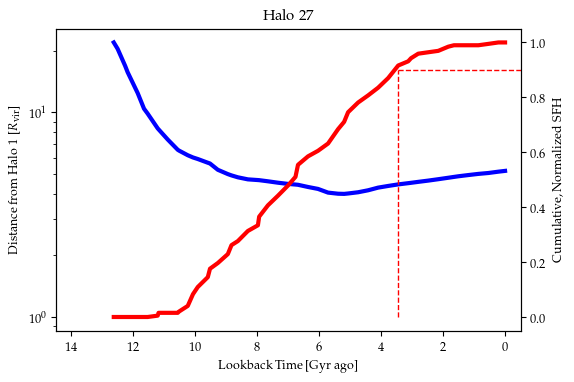

2.47813718746948
2.47813718746948


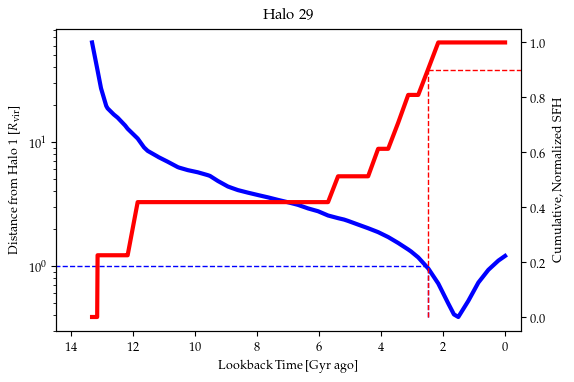

1.1851960461388167
11.205489891053029


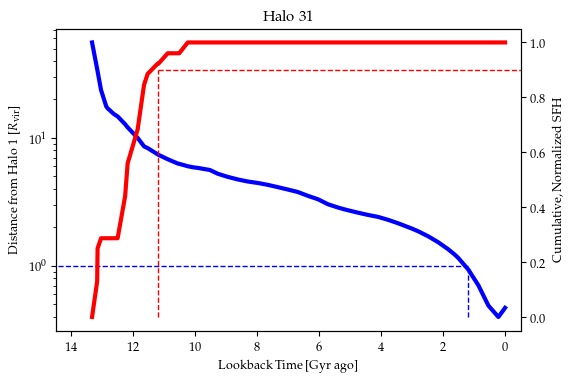

5.387254755254723
7.003431181803606


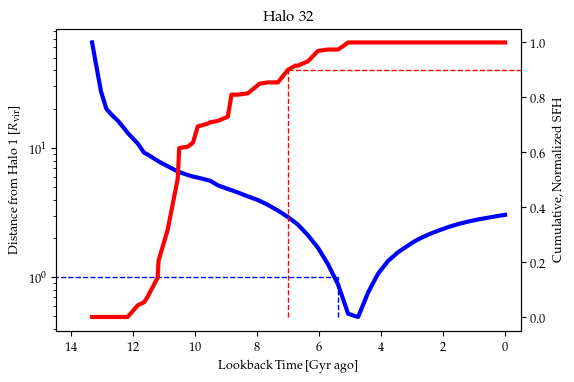

1.5084313314506215


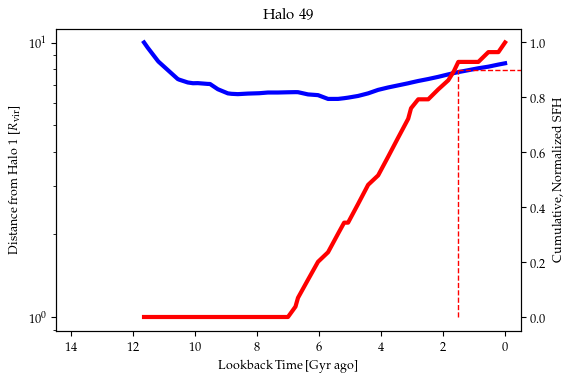

4.740784184636752
13.144901603065318


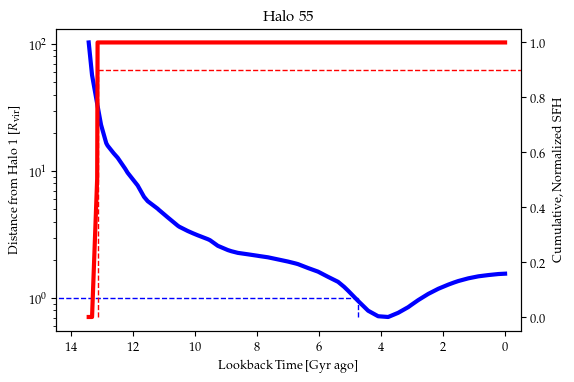

1.649846768773683


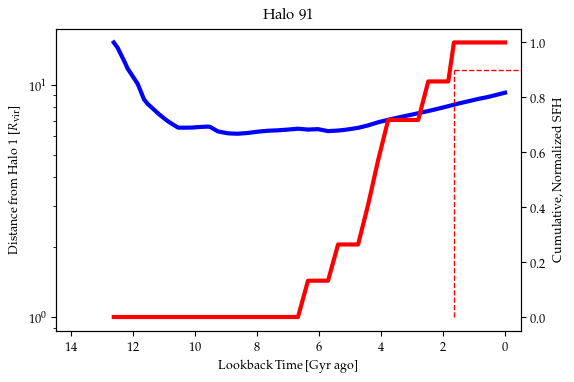

5.387254755254723
12.25600456839904


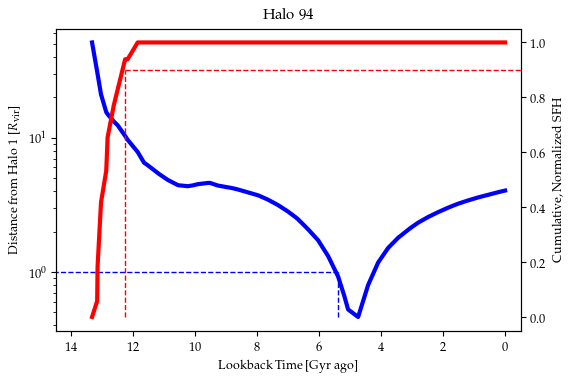

8.942842893690639
9.912548749701417


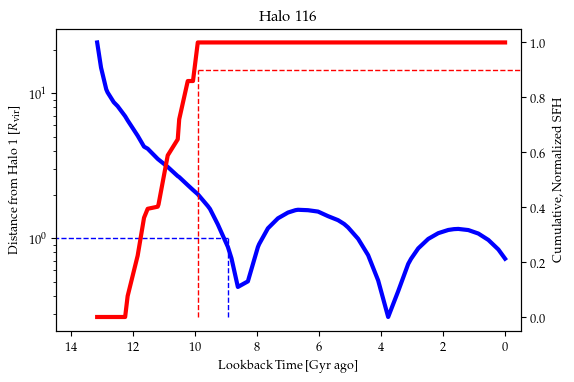

5.1919667703813595


/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
/home/akinshol/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater


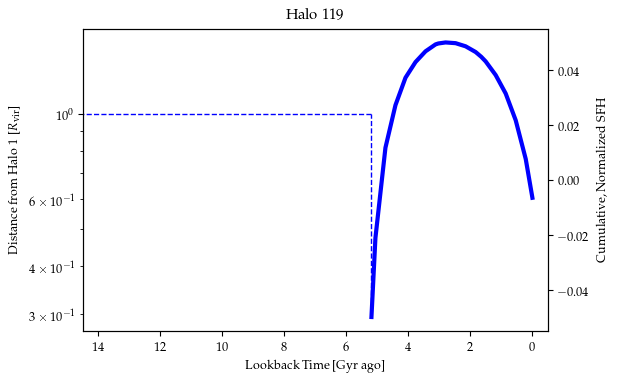

13.32335441684371


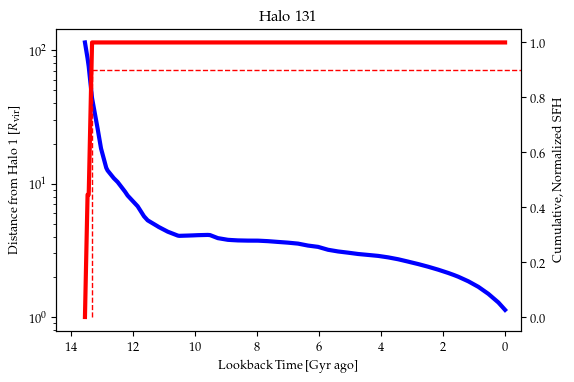

0.5387254755160633


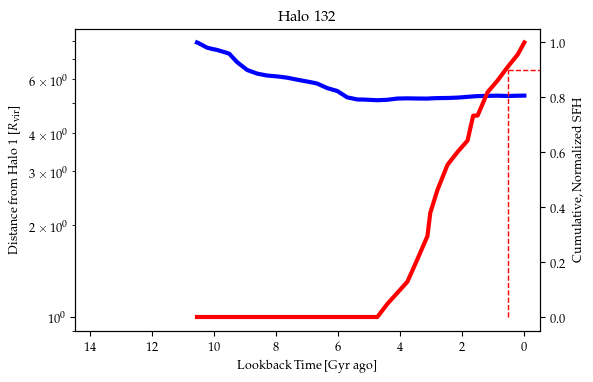

9.589313464363485
13.033789473731849


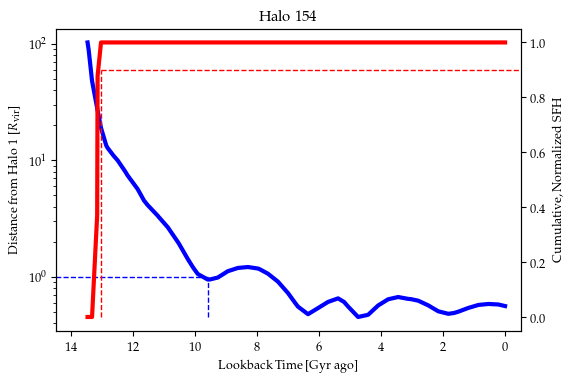

2.801372472779038


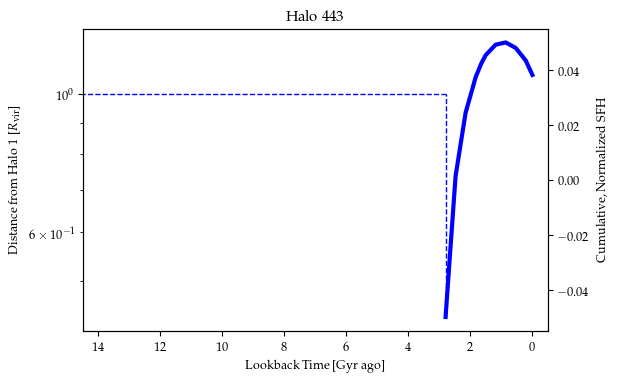

In [44]:
tstep = -1
haloids = np.array([7, 10, 13, 15, 19, 27, 29, 31, 32, 49, 55, 91, 94, 116, 119, 131, 132, 154, 443])


tquench = []
tinfall = []
mass = []
newids = []

for haloid in haloids:
    halo = s.timesteps[tstep].halos[haloid-1]
    halo.keys()
    Rvir, X, Y, Z, Mvir, SFR, t, z, halo_num = halo.calculate_for_progenitors(
        'Rvir','Xc','Yc','Zc','Mvir', 'SFR_100Myr','t()','z()', 'halo_number()')
    if halo['n_star'] == 0:
        continue 
        

    
    halo1 = s.timesteps[-1].halos[0]
    h1x, h1y, h1z, h1r, h1t = halo1.calculate_for_progenitors('Xc','Yc','Zc','Rvir','t()')

    t = np.array(t)
    minimum = np.min(t)-0.01
    maximum = np.max(t)+0.01
    matchTime = (h1t > minimum)&(h1t < maximum)

    nh1x = h1x[matchTime]
    nh1y = h1y[matchTime]
    nh1z = h1z[matchTime]
    nh1r = h1r[matchTime]
    
    fig, ax1 = plt.subplots(dpi=100)
    h1dist2 = np.sqrt((X-nh1x)**2 + (Y-nh1y)**2 + (Z-nh1z)**2 ) / nh1r
    age = 13.800797497330507
    try:
        ti = age-np.min(t[h1dist2 < 1.])
        ax1.plot([ti,ti],[np.min(h1dist2),1],'b--',linewidth=1,zorder=0)
        print(ti)
    except:
        ti = None
        
    ax1.plot(age-t,h1dist2,'b-', linewidth=3)
    ax1.plot([ti,15],[1,1],'b--',linewidth=1,zorder=0)
    ax1.set_xlim(-0.5,14.5)
    ax1.set_xlabel(r'Lookback Time [Gyr ago]')
    ax1.set_ylabel(r'Distance from Halo 1 [$R_{\mathrm{vir}}$]')
    ax1.semilogy()
    ax1.invert_xaxis()
    ax1.set_title(f'Halo {haloid}')

    ax2 = ax1.twinx()

    cSFR = np.cumsum(np.flip(SFR,axis=0))/np.sum(SFR)
    t = np.flip(t,axis=0)
    try: 
        tq = age - np.min(t[cSFR > 0.9])
        print(tq)
        ax2.plot([tq,tq],[0,0.9],'r--',linewidth=1,zorder=0)
        ax2.plot([tq,-0.5],[0.9,0.9],'r--',linewidth=1,zorder=0)
    except:
        tq = None
        
    tquench.append(tq)
    tinfall.append(ti)
    m = halo['M_star']
    mass.append(m)
    newids.append(haloid)
    
        
    ax2.plot(age-t, cSFR, linewidth=3, c='r')
    ax2.set_ylabel('Cumulative, Normalized SFH')

    plt.savefig('halo%s.png' % haloid, dpi=200)
    plt.show()

19 19


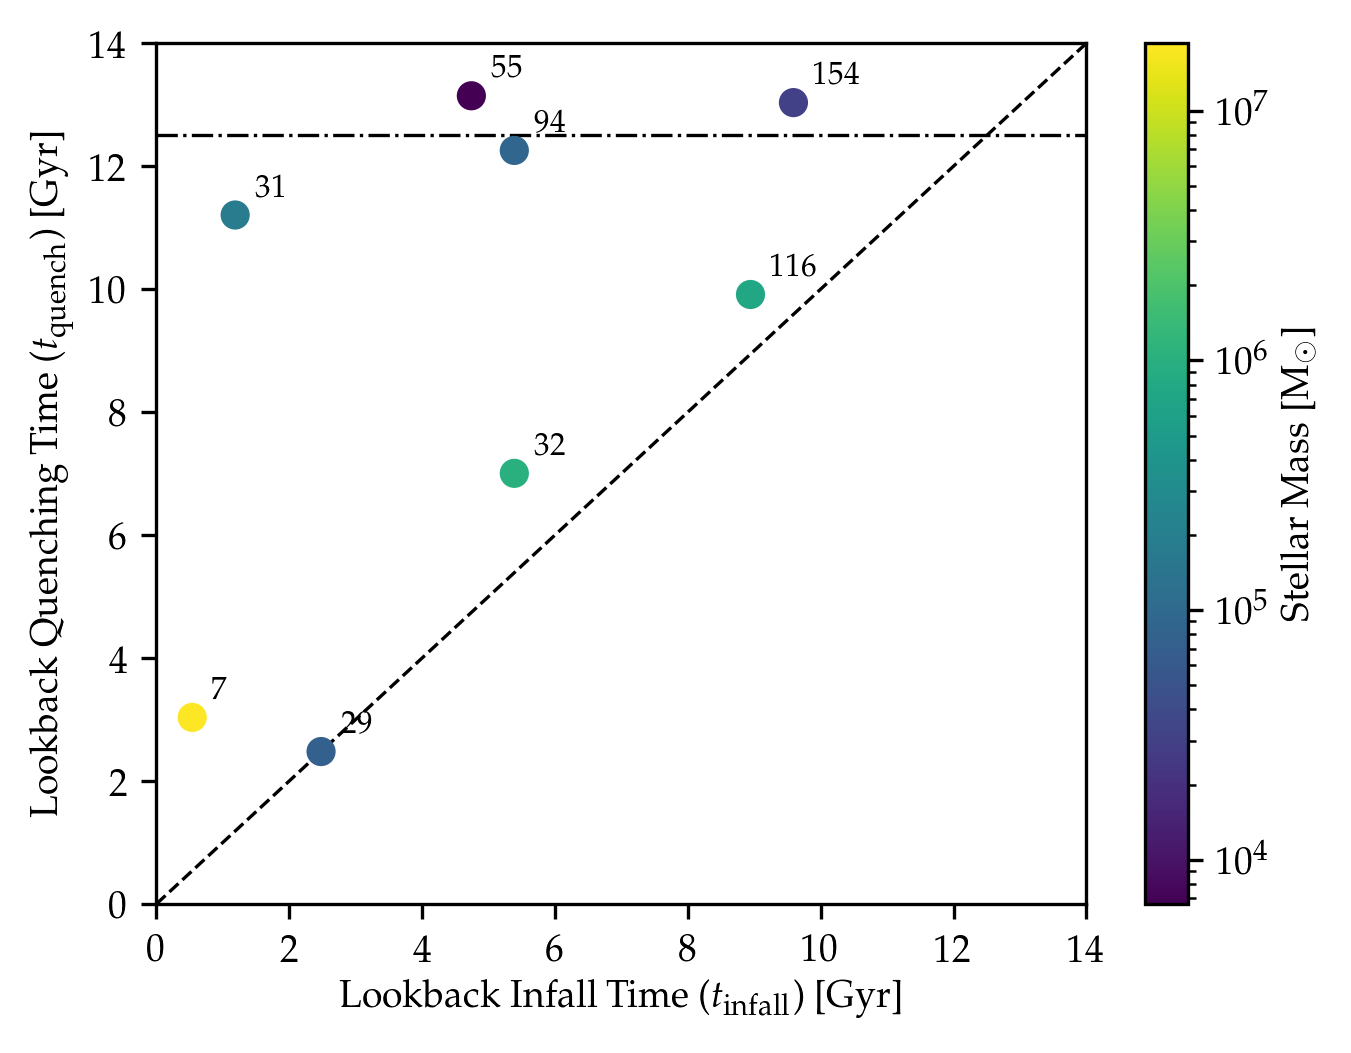

In [45]:
reiontime = 12.5
x = tinfall
y = tquench
print(len(x),len(y))
fig, ax = plt.subplots(1,1,figsize=(5,3.8),dpi=300)
im = ax.scatter(x, y, c=np.array(mass,dtype=float), norm=mpl.colors.LogNorm(), marker='o', zorder=10)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'Stellar Mass [$\mathrm{M}_{\odot}$]')
ax.plot([0,20],[0,20], '--', linewidth=0.8, color='k', zorder=0)
ax.plot([0,20], [reiontime,reiontime], '-.', linewidth=0.8, color='k', zorder=1)
for i, txt in enumerate(newids):
    if x[i] != None and y[i] != None:
        ax.annotate(txt, (x[i]+0.3, y[i]+0.3), size=7.5)
ax.set_xlabel('Lookback Infall Time ($t_{\mathrm{infall}}$) [Gyr]')
ax.set_ylabel('Lookback Quenching Time ($t_{\mathrm{quench}}$) [Gyr]')
ax.set_xlim(0,14)
ax.set_ylim(0,14)

plt.show()

In [17]:
from tangos.relation_finding import tree

tstep = -1
haloid = 6

halo = s.timesteps[tstep].halos[haloid-1]

tree = tree.MergerTree(halo)
tree.construct()
plt.figure(dpi=100,figsize=(10,20))
tree.plot()
plt.show()
# print(str(tree).replace('\r\n','')) 

2019-06-26 13:07:06,326 : Tree build complete; total time 1.26s
2019-06-26 13:07:06,327 :   Progenitor query took 0.88s
2019-06-26 13:07:06,328 :   Property query took 0.02s
2019-06-26 13:07:06,329 :   Tree post-processing took 0.36s


NameError: name 'plt' is not defined

2019-06-27 14:14:06,837 : Tree build complete; total time 0.91s
2019-06-27 14:14:06,838 :   Progenitor query took 0.66s
2019-06-27 14:14:06,839 :   Property query took 0.08s
2019-06-27 14:14:06,840 :   Tree post-processing took 0.16s


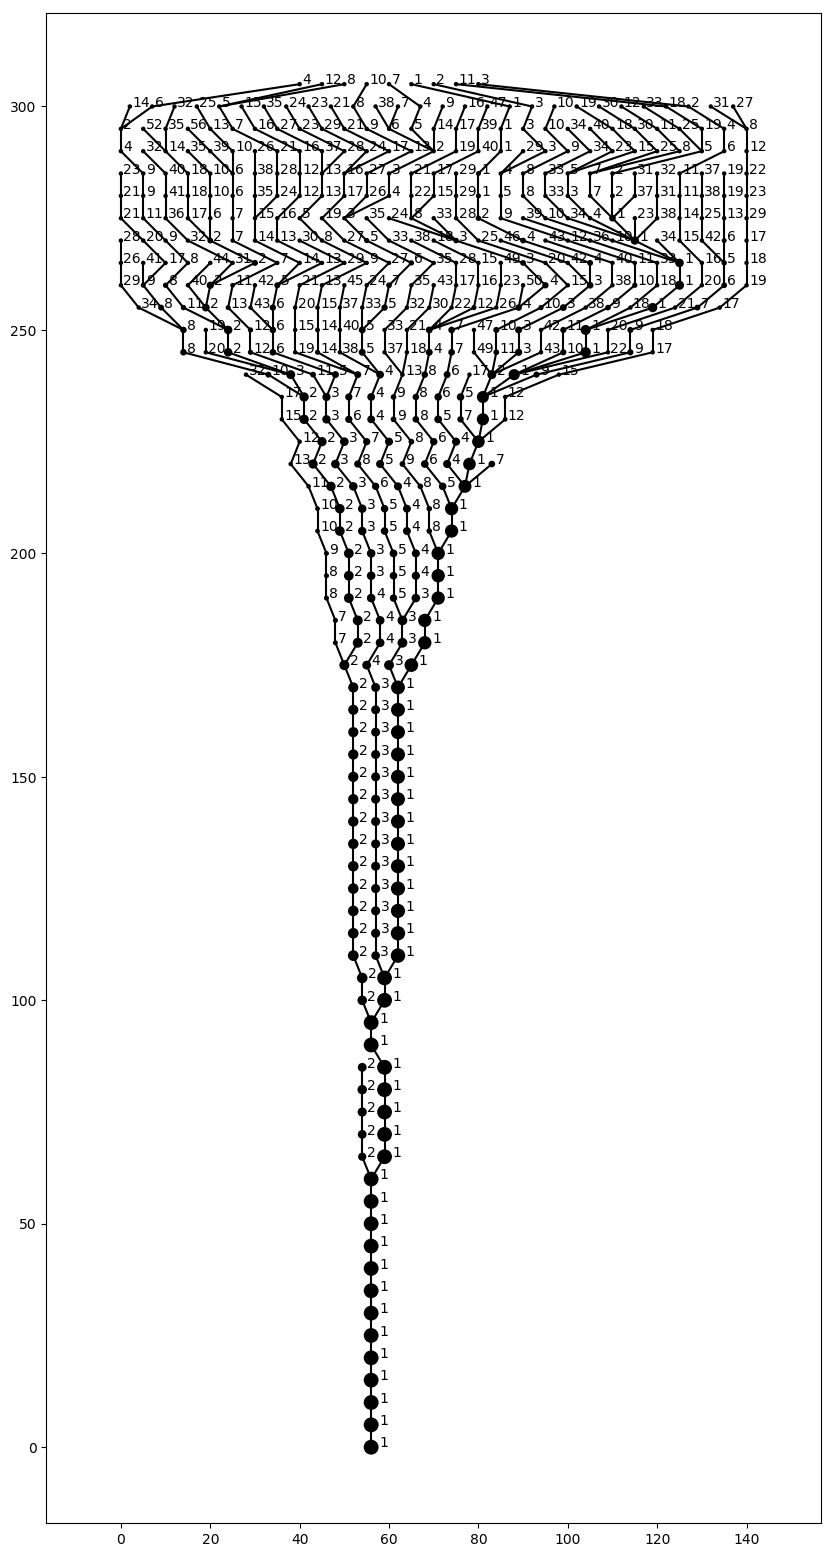

In [5]:
import os
os.environ['TANGOS_DB_CONNECTION'] = '/home/akinshol/Data/Timescales/TangosData/h329.db'
import tangos
import matplotlib.pyplot as plt
%matplotlib inline
s = tangos.get_simulation('snapshots')
halo = s.timesteps[-1].halos[0]

from tangos.relation_finding import tree
tree = tree.MergerTree(halo)
tree.construct()
plt.figure(dpi=100,figsize=(10,20))
tree.plot()
plt.savefig('mergertree.png',dpi=100)
plt.show()

In [3]:
plt.show()

In [17]:
print(len(['004096','003968','003840','003712','003606','003584','003456','003328','003200',     
    '003195','003072','002944','002816','002688','002554','002432','002304','002176','002088','002048',
    '001920','001740','001536','001408','001280','001269','001152','001106','001024','000974','000896',
    '000866','000768','000701','000640','000512','000456','000384','000347','000275','000225','000188',
    '000139']))

43
